In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'

In [2]:
import requests



text = requests.get(url).content.decode('utf-8')

print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-f

In [3]:
from html.parser import HTMLParser



class MyHTMLParser(HTMLParser):

    script = False

    res = ""

    def handle_starttag(self, tag, attrs):

        if tag.lower() in ["script","style"]:

            self.script = True

    def handle_endtag(self, tag):

        if tag.lower() in ["script","style"]:

            self.script = False

    def handle_data(self, data):

        if str.strip(data)=="" or self.script:

            return

        self.res += ' '+data.replace('[ edit ]','')



parser = MyHTMLParser()

parser.feed(text)

text = parser.res

print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 History 5 See also 6 References Toggle the table of contents Data science 46 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Ned

In [4]:
import nlp_rake

extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)

res = extractor.apply(text)

res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.925373134328358),
 ('information science', 3.925373134328358),
 ('computer science', 3.925373134328358),
 ('statistical learning', 3.9),
 ('^ davenport', 3.8),
 ('data analysis', 3.75),
 ('science', 1.9253731343283582),
 ('analysis', 1.75),
 ('insights', 1.6666666666666667),
 ('field', 1.4285714285714286),
 ('computational', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

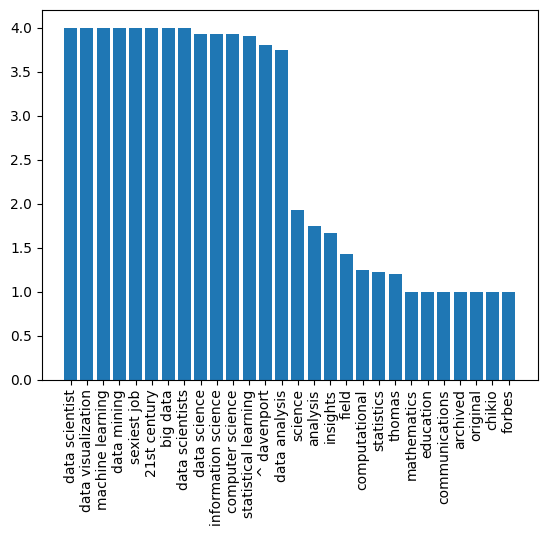

In [5]:
import matplotlib.pyplot as plt



def plot(pair_list):

    k,v = zip(*pair_list)

    plt.bar(range(len(k)),v)

    plt.xticks(range(len(k)),k,rotation='vertical')

    plt.show()



plot(res)

In [6]:
!{sys.executable} -m pip install wordcloud

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


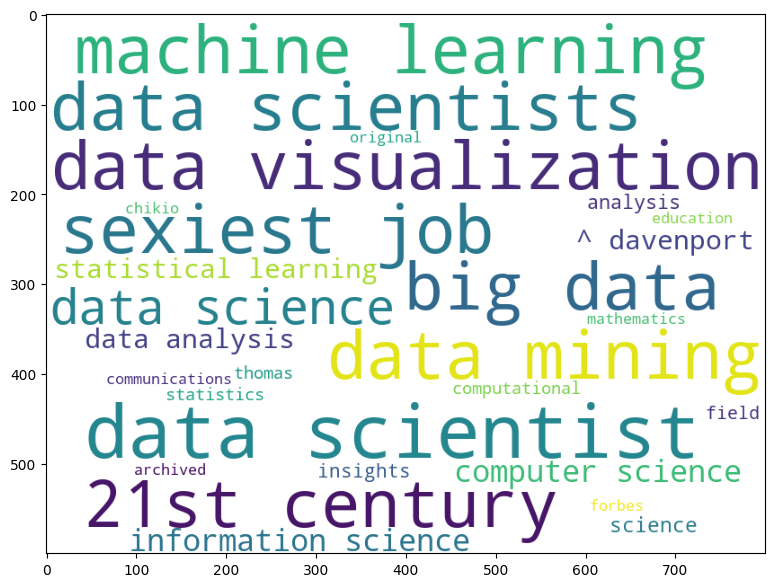

In [7]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt



wc = WordCloud(background_color='white',width=800,height=600)

plt.figure(figsize=(15,7))

plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

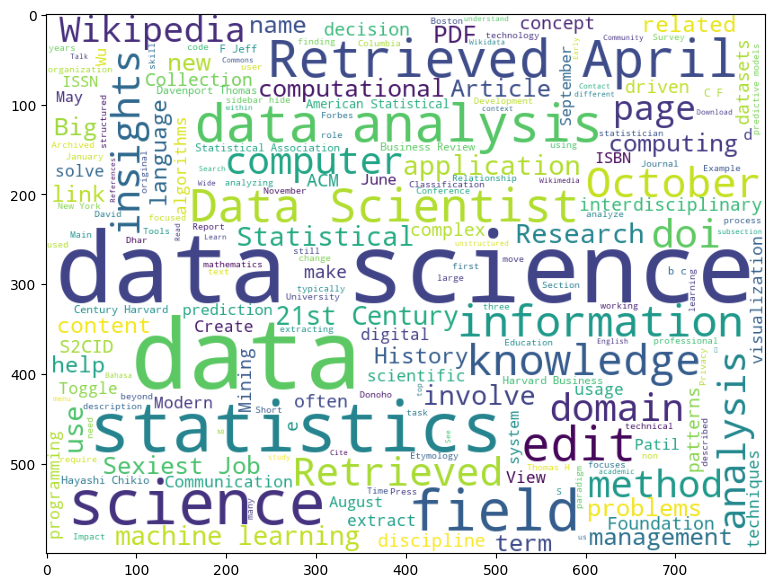

In [8]:
plt.figure(figsize=(15,7))

plt.imshow(wc.generate(text))